In [1]:
from __future__ import division
import csv
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import gamma,norm,rayleigh,describe,scoreatpercentile
import pylab as pl
get_ipython().magic(u'matplotlib inline')

In [2]:
#import data
Electricity_EF_data = pd.read_csv('Electricity_EF_data.csv')
pipe_construction_data = pd.read_csv('pipe_construction_data.csv')
pipe_diameter_data = pd.read_csv('pipe_diameter_data2.csv')
pipe_maintenance_data = pd.read_csv('pipe_maintenance_data.csv')
pump_construction_data = pd.read_csv('pump_construction_data.csv')
steel_data = pd.read_csv('steel_data.csv')
transportation_data = pd.read_csv('transportation_data.csv')
treatment_data = pd.read_csv('treatment_data.csv')


#user set parameters
demand=0.2 #m3/person-day
people_range=range(100,10600,500)

Electric_Utility="SFPUC"
Electric_Utility_pipes="2010 CA Power Mix"
pipe_material="PE"
miles_to_disposal=30
miles_transport=50
discount=0.04
lifetime=50
lifetime_treatment=25
##pop_density=500 #people/km2
street_density=8000 #m/km2
pump_operating_fraction=0.8
Grinder_pump_usage=0.2 # h/day
UV_rating=9.5 #W/m3/d
UV_capital_cost=4 #$/W 2014
UV_usage=12 #h/day
UV_lifetime= 5 #y
Screen_Filter_capital_cost=2500 #($ 2015)
Screen_Filter_capital_energy=23800
Screen_Filter_capital_GHG=1632 
Grinder_pump_hp=1.5 
Grit_chamber_time=0.02 #h (small and decentralized Tchobanoglous)
media_filtration_energy=0.05 #kWh/m3 (Opportunities and Economics of water reuse)
filter_screen_energy=0.008 #kWh/m3 (Opportunities and Economics of water reuse)
consumption_pressure=20 #m
settling_tank_CO2=0.033 #kg/capita-day
settling_tank_CH4=0.011 #kg/capita-day
settling_tank_N20=0.000005 #kg/capita-day
GWP_CH4=25
GWP_N20=298

storage_days=3
retention_time=6 #h
tank_height=3
Treatment_Tech=["Screen Filter", "Grinder", "MBR","UV Disinfection","Chlorination"]
flocculation_time=0.33 #hours
coagulation_time=0.028 #hours
sludge_mass= 0.1
percent_fertilizer= 0.5 #percent of sludge disposed as fertilizer
percent_landfill= (1-percent_fertilizer)



# In[4]:

#specify model parameters
electricity_cost=0.12 #$/kwh
specific_weight_water=9.807 #KN/m3
water_density=1000 #kg/m3
gravity=9.8 #m/s2
excavation_cost=4.6 #$/m3
excavation_energy=153 #MJ/m3
excavation_GHG=43.4 #kgCO2/m3
motor_efficiency=0.95
transport_cost=0.13 #$/ton-mile
transport_energy=8.16 #MJ/ton-mile
transport_GHG=0.656 #kgCo2/ton-mile
steel_cost=0.769 #$/kg
steel_GHG=1.3 #kgCO2/kg
steel_energy=17.5
steel_sheet_mass=186.9
steel_sheet_area=3.72
cement_energy=2820 #MJ/m3
cement_GHG=330 #kgCO2/m3
cement_cost=0.00005 #$/kg
reinf_concrete_energy=19 #Mj/$
reinf_concrete_GHG=1.794 #kgCo2/$
reinf_concrete_cost=115 # $/m3

Water_energy_intensity=1.12 #kWh/m3
Water_GHG_intensity=0.36 #kgCO2/m3

#specify treatment parameters
MBR_GHG=0.23 #kgCO2/m3
sludge_mass=0.4 #kg/m3 water treated
landfill_GHG=0.04
fertilizer_GHG=0
chlorine_energy=42 #MJ/kg
chlorine_GHG=0.74 #kg/kg
chlorine_mass=15 #mg/L
chlorine_retention_time=1 #h



###Results
Scale_final=[]
grid_ID_final=[]

Total_conveyance_capital_cost_final=[]
Total_conveyance_capital_GHG_final=[]
Total_conveyance_capital_energy_final=[]
Total_conveyance_operational_cost_final=[]
Total_conveyance_operational_GHG_final=[]
Total_conveyance_operational_energy_final=[]

Total_Treatment_Capital_cost_final=[]
Total_Treatment_Capital_energy_final=[]
Total_Treatment_Capital_GHG_final=[]
Total_Treatment_Operational_cost_final=[]
Total_Treatment_Operational_energy_final=[]
Total_Treatment_Operational_GHG_final=[]
Total_Treatment_energy_offsets=[]
Total_Treatment_GHG_offsets=[]

Total_Cost_final=[]
Total_Energy_final=[]
Total_GHG_final=[]


Pipe_capital_cost_final=[]
Pump_capital_cost_final=[]
Tank_capital_cost_final=[]
Pipe_capital_GHG_final=[]
Pump_capital_GHG_final=[]
Tank_capital_GHG_final=[]
Pipe_capital_energy_final=[]
Pump_capital_energy_final=[]
Tank_capital_energy_final=[]

Pipe_operat_cost_final=[]
Pump_operat_cost_final=[]
Pipe_operat_GHG_final=[]
Pump_operat_GHG_final=[]
Pipe_operat_energy_final=[]
Pump_operat_energy_final=[]

MBR_Operational_cost_final=[]
CoagFlocc_Capital_cost_final=[]
MBR_Capital_energy_final=[]
CoagFlocc_Capital_energy_final=[]
MBR_Capital_GHG_final=[]
CoagFlocc_Capital_GHG_final=[]

MBR_Capital_cost_final=[]
CoagFlocc_Operational_cost_final=[]
Sludge_transport_cost_final=[]
MBR_Operational_energy_final=[]
CoagFlocc_Operational_energy_final=[]
Chlorine_operational_energy_final=[]
Sludge_transport_energy_final=[]
Sludge_thick_dewater_energy_final=[]
MBR_Operational_GHG_final=[]
CoagFlocc_Operational_GHG_final=[]
Chlorine_operational_GHG_final=[]
Sludge_transport_GHG_final=[]
Sludge_disposal_GHG_final=[]
Sludge_thick_dewater_GHG_final=[]

Grinder_Capital_cost_final=[]
Grinder_Capital_energy_final=[]
Grinder_Capital_GHG_final=[]
Grinder_Operational_energy_final=[]
Grinder_Operational_cost_final=[]
Grinder_Operational_GHG_final=[]
UV_Capital_cost_final=[]
UV_Capital_energy_final=[]
UV_Capital_GHG_final=[]
UV_Operational_energy_final=[]
UV_Operational_cost_final=[]
UV_Operational_GHG_final=[]
SF_Capital_cost_final=[]
SF_Capital_energy_final=[]
SF_Capital_GHG_final=[]
SF_Operational_energy_final=[]
SF_Operational_GHG_final=[]
settling_tank_GHG_final=[]

Total_ENERGY_m3=[]
Total_GHG_m3=[]

In [3]:
elevation_data=[]
grid_data = pd.read_csv('results_GIS_SF_2.csv')

#select grid where pop_density>0
grid_data=grid_data[grid_data.pop_density_current != 0]


In [4]:
# ##Conveyance

#iterate for each grid
iteration=0
consumption_pressure=20

while iteration <=10000:
    iteration=iteration+1
    demand=np.random.uniform(0.1,0.3) #m3/person-day
    slope_index=0.02
    pop_density_grid=3000
    length_centralized_m=1000
    slope_index=np.random.uniform(0.9*slope_index,1.1*slope_index)
    pop_density_grid=np.random.uniform(0.9*pop_density_grid,1.1*pop_density_grid)
    length_centralized_m=np.random.uniform(0.7*length_centralized_m,1.3*length_centralized_m)
    
    miles_to_disposal=np.random.triangular(10,30,50)
    miles_transport=np.random.triangular(20,50,80)
    discount=np.random.uniform(0.02,0.06)
    lifetime=np.random.uniform(0.8*lifetime,1.2*lifetime)
    lifetime_treatment=np.random.uniform(0.8*lifetime_treatment,1.2*lifetime_treatment)
    ##pop_density=500 #people/km2
    street_density=np.random.triangular(4000,8000,15000) #m/km2
    pump_operating_fraction=np.random.triangular(0.4,0.8,0.95)
    Grinder_pump_usage=np.random.triangular(0.1,0.2,0.8) # h/day
    UV_rating=np.random.triangular(8,9.5,12) #W/m3/d
    UV_capital_cost=np.random.triangular(2,4,10) #$/W 2014
    UV_usage=np.random.triangular(8,12,20) #h/day
    UV_lifetime= 5 #y
    UV_lifetime=np.random.uniform(0.8*UV_lifetime,1.2*UV_lifetime)
    Screen_Filter_capital_cost=np.random.uniform(0.8*Screen_Filter_capital_cost,1.2*Screen_Filter_capital_cost) #($ 2015/m3/d)
    Screen_Filter_capital_energy=np.random.uniform(0.8*Screen_Filter_capital_energy,1.2*Screen_Filter_capital_energy) 
    Screen_Filter_capital_GHG=np.random.uniform(0.8*Screen_Filter_capital_GHG,1.2*Screen_Filter_capital_GHG) 
    Grinder_pump_hp=np.random.triangular(1,1.5,2)
    Grit_chamber_time=np.random.uniform(0.0125,0.025) 
    media_filtration_energy=np.random.uniform(0.03,0.08)  #kWh/m3 (Opportunities and Economics of water reuse)
    filter_screen_energy=np.random.uniform(0.001,0.0013)  #kWh/m3 (Opportunities and Economics of water reuse)
    
    storage_days=np.random.uniform(2,5)
    retention_time=np.random.uniform(3,12)
    
    sludge_mass= np.random.uniform(0.8*sludge_mass,1.2*sludge_mass)
    percent_fertilizer= np.random.triangular(0,0.5,1) #percent of sludge disposed as fertilizer
    percent_landfill= (1-percent_fertilizer) 
    
    excavation_energy=np.random.uniform(0.8*excavation_energy,1.2*excavation_energy) #MJ/m3
    excavation_GHG=np.random.uniform(0.8*excavation_GHG,1.2*excavation_GHG) #kgCO2/m3
    
    cement_energy=np.random.uniform(0.8*cement_energy,1.2*cement_energy) #MJ/m3
    cement_GHG=np.random.uniform(0.8*cement_GHG,1.2*cement_GHG) #kgCO2/kg
    reinf_concrete_energy=np.random.uniform(0.8*reinf_concrete_energy,1.2*reinf_concrete_energy) #MJ/m3
    reinf_concrete_GHG=np.random.uniform(0.8*reinf_concrete_GHG,1.2*reinf_concrete_GHG) #kgCO2/kg

    steel_energy=np.random.uniform(0.8*steel_energy,1.2*steel_energy) #MJ/m3
    steel_GHG=np.random.uniform(0.8*steel_GHG,1.2*steel_GHG)
    transport_energy=np.random.uniform(0.8*transport_energy,1.2*transport_energy) #MJ/m3
    transport_GHG=np.random.uniform(0.16,2.9)
    
    landfill_GHG=np.random.uniform(0.7*landfill_GHG,1.3*landfill_GHG)
    
    chlorine_energy=np.random.uniform(0.8*chlorine_energy,1.2*chlorine_energy) #MJ/m3
    chlorine_GHG=np.random.uniform(0.8*chlorine_GHG,1.2*chlorine_GHG)
    chlorine_mass=np.random.uniform(6,20)
    MBR_GHG=np.random.triangular(0.1,0.23,0.3)


    People=3000
    pipe_length=People/pop_density_grid*street_density
    if pipe_length>street_density/2:
        pipe_length=street_density/2
    if People>pop_density_grid/2:
        elevation=500*slope_index
    else: 
        elevation=math.sqrt(People/pop_density_grid)*slope_index*1000
    if elevation==0:
        elevation=0.1


    #Calculate pipe diameter
    total_dem=People*demand/(24) #m3/h
    if total_dem<1:
        total_dem=1
    else:
        total_dem=round(total_dem)

    pd_data = pipe_diameter_data
    k=pd_data.set_index('Flow_Rate_m3_h')
    pipe_diameter=k.PVC_Diameter_mm[total_dem]

    total_demand=People*demand/(24) #m3/h
    pipe_area=math.pi*(pipe_diameter*0.001/2)**2
    pipe_velocity=total_dem/(3600*pipe_area)


    #normDiameterList = (40, 50, 63, 75, 90, 100, 125, 160, 200, 250, 300, 350, 400, 450, 500, 600)
    normDiameterList = (50, 100, 160, 200, 350, 375, 450)
    index=normDiameterList.index(pipe_diameter)

    h1=0.03*pipe_length/((pipe_diameter)*0.001)*(pipe_velocity**2)/(2*9.81)
    threshold=0.30*(elevation)

    while h1>threshold:
        index=index+1
        pipe_diameter=normDiameterList[index]
        pipe_area_2=math.pi*(pipe_diameter*0.001/2)**2
        pipe_velocity=total_demand/(3600*pipe_area_2)
        h1=0.03*pipe_length/((pipe_diameter)*0.001)*(pipe_velocity**2)/(2*9.81)

    if pipe_velocity<=2.5:
        pipe_diameter=pipe_diameter
    else:
        index=index+1
        pipe_diameter=normDiameterList[index]

    pipe_area_2=math.pi*(pipe_diameter*0.001/2)**2
    pipe_velocity_2=total_demand/(3600*pipe_area_2)



    ###Pipes
    #Piping construction
    pipe_construction_df=pipe_construction_data[(pipe_construction_data['Material'] == (pipe_material))]
    h=pipe_construction_df.set_index('size_mm')
    pipe_emissions_EF=h.Emissions_kgCO2_eq_m[pipe_diameter]

    pipe_energy_EF=h.Embodied_Energy_MJ_kg[pipe_diameter]
    pipe_cost_EF=h.cost_2012_m[pipe_diameter]
    pipe_weight=h.Wt_kg_m[pipe_diameter]
    pipe_excav_vol=h.Excavation_vol_m3_m[pipe_diameter]
    
    pipe_energy_EF=np.random.uniform(0.8*pipe_energy_EF,1.2*pipe_energy_EF)
    pipe_emissions_EF=np.random.uniform(0.8*pipe_emissions_EF,1.2*pipe_emissions_EF)

    Electricity_GHG_df=Electricity_EF_data[(Electricity_EF_data['Name'] == (Electric_Utility))]
    Electricity_GHG_LCA=Electricity_GHG_df['EF_Lifecycle_kg_kWh'].iloc[0]
    Electricity_GHG_direct=Electricity_GHG_df['EF_Direct_kg_kWh'].iloc[0]

    Electricity_GHG_df_pipes=Electricity_EF_data[(Electricity_EF_data['Name'] == (Electric_Utility_pipes))]
    Electricity_GHG_LCA_pipes=Electricity_GHG_df['EF_Lifecycle_kg_kWh'].iloc[0]
    
    Electricity_GHG_LCA=np.random.uniform(0.7*Electricity_GHG_LCA,1.3*Electricity_GHG_LCA)
    Electricity_GHG_LCA_pipes=np.random.uniform(0.7*Electricity_GHG_LCA_pipes,1.3*Electricity_GHG_LCA_pipes)


    Pipe_const_cost=pipe_length*(pipe_cost_EF)/lifetime
    Pipe_const_energy=(pipe_length*(pipe_energy_EF)*(pipe_weight))/lifetime
    #Pipe_const_GHG=Pipe_const_energy/3.6*Electricity_GHG_LCA_pipes
    Pipe_const_GHG=pipe_emissions_EF*pipe_length/lifetime

    #Piping excavation
    Pipe_mass=pipe_length*(pipe_weight)
    Pipe_excavation_vol=pipe_length*(pipe_excav_vol)
    Pipe_excavation_cost=Pipe_excavation_vol*(excavation_cost)/lifetime
    Pipe_excavation_energy=Pipe_excavation_vol*(excavation_energy)/lifetime
    Pipe_excavation_GHG=Pipe_excavation_vol*(excavation_GHG)/lifetime

    #Piping transportation
    Pipe_transport_cost=transport_cost*miles_transport*Pipe_mass/(1000*lifetime)
    Pipe_transport_energy=transport_energy*miles_transport*Pipe_mass/(1000*lifetime)
    Pipe_transport_GHG=transport_GHG*miles_transport*Pipe_mass/(1000*lifetime)



    #Piping maintenance
    pipe_maintenance_data['cost_discount_y'] = pipe_maintenance_data['cost_m']*pipe_length/((1+discount)**(pipe_maintenance_data['year_']-1))
    pipe_maintenance_data['energy_y'] = pipe_maintenance_data['KWh_m']*pipe_length*3.6
    pipe_maintenance_data['GHG_y'] = pipe_maintenance_data['energy_y']/3.6*Electricity_GHG_LCA_pipes

    pipe_maint_lifetime=pipe_maintenance_data[pipe_maintenance_data['year_'] <= lifetime]
    pipe_maint_cost=pipe_maint_lifetime['cost_discount_y'].sum()/lifetime
    pipe_maint_GHG=pipe_maint_lifetime['GHG_y'].sum()/lifetime
    pipe_maint_energy=pipe_maint_lifetime['energy_y'].sum()/lifetime
    
    pipe_maint_energy=np.random.uniform(0.8*pipe_maint_energy,1.2*pipe_maint_energy)
    pipe_maint_GHG=np.random.uniform(0.8*pipe_maint_GHG,1.2*pipe_maint_GHG)


    #Totals Pipes
    Pipe_capital_cost=Pipe_const_cost+Pipe_excavation_cost+Pipe_transport_cost
    Pipe_capital_energy=Pipe_const_energy+Pipe_excavation_energy+Pipe_transport_energy
    Pipe_capital_GHG=Pipe_const_GHG+Pipe_excavation_GHG+Pipe_transport_GHG

    Pipe_operat_cost=pipe_maint_cost
    Pipe_operat_energy=pipe_maint_energy
    Pipe_operat_GHG=pipe_maint_GHG




    #Calculate headloss
    headloss=0.03*pipe_length/((pipe_diameter)*0.001)*(pipe_velocity_2**2)/(2*9.81)



    #Calculate Pressure
    head=elevation-0
    pressure=((pipe_velocity_2**2)*water_density/2+(consumption_pressure/10*101325)+(head*gravity*water_density)+(headloss*gravity*water_density))
    total_head=pressure/(water_density*gravity)


    #Calculate pump effieciency
    p_hp=(specific_weight_water*total_head*(total_demand/3600)/(0.4*motor_efficiency))*1.34
    if p_hp<3:
        pump_efficiency=0.4
    elif 3<=p_hp<7:
        pump_efficiency=0.45
    elif 7<=p_hp<15:
        pump_efficiency=0.5
    elif 15<=p_hp<40:
        pump_efficiency=0.55
    elif 40<=p_hp<60:
        pump_efficiency=0.6
    else:
        pump_efficiency=0.7
    p_hp=(specific_weight_water*total_head*(total_demand/3600)/(pump_efficiency*motor_efficiency))*1.34

    #Calculating actual pump horsepower
    Pump_energy_hp=p_hp*3.6*8765/1.34*pump_operating_fraction
    hp=round(((Pump_energy_hp/3.6)*1.34/8765),2)
    if hp<=0.5:
        pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765)*2,1)/2
    elif 0.5<hp<10:
        pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765),0)
    elif 10<=hp<100:
        pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765)/10,0)*10
    else:
        pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765)*2/1000,1)*1000/2




    #Pump Operation
    Pump_operat_energy=specific_weight_water*total_head*(total_demand/3600)*pump_operating_fraction*24*365/(pump_efficiency*motor_efficiency)*3.6
    Pump_operat_GHG=Pump_operat_energy/3.6*Electricity_GHG_LCA
    Pump_operat_cost=Pump_operat_energy/3.6*electricity_cost


    #Pump Construction
    t=pump_construction_data.set_index('Rating_hp')
    pump_cost_EF=t.Cost_2012[pump_hp]
    pump_energy_EF=t.Embodied_Energy_MJ[pump_hp]
    pump_GHG_EF=t.Emissions_kgCO_eq[pump_hp]
    pump_weight=t.Wt_kg[pump_hp]
    
    pump_energy_EF=np.random.uniform(0.8*pump_energy_EF,1.2*pump_energy_EF)
    pump_GHG_EF=np.random.uniform(0.8*pump_GHG_EF,1.2*pump_GHG_EF)

    pump_construction_energy=pump_energy_EF/lifetime_treatment
    pump_construction_GHG=pump_GHG_EF/lifetime_treatment
    pump_construction_cost=pump_cost_EF/lifetime_treatment

    pump_transport_cost=pump_weight*miles_transport*transport_cost/(1000*lifetime_treatment)
    pump_transport_energy=pump_weight*miles_transport*transport_energy/(1000*lifetime_treatment)
    pump_transport_GHG=pump_weight*miles_transport*transport_GHG/(1000*lifetime_treatment)


    #Totals Pumps
    Pump_capital_cost=pump_construction_cost+pump_transport_cost
    Pump_capital_energy=pump_construction_energy+pump_transport_energy
    Pump_capital_GHG=pump_construction_GHG+pump_transport_GHG


    #Tanks
    tank_volume=storage_days*total_demand*24 #m3
    tank_radius=math.sqrt(tank_volume/(math.pi*tank_height))
    tank_area=2*math.pi*tank_radius*tank_height+2*math.pi*tank_radius**2
    tank_cement_volume=0.1*tank_area
    tank_mass_steel=round(tank_area/steel_sheet_area,0)*steel_sheet_mass

    equilization_tank_volume=retention_time*total_demand
    equilization_tank_radius=math.sqrt(equilization_tank_volume/(math.pi*tank_height))
    equilization_tank_area=2*math.pi*equilization_tank_radius*tank_height+2*math.pi*equilization_tank_radius**2
    equilization_tank_mass_steel=round(equilization_tank_area/steel_sheet_area,0)*steel_sheet_mass

    #tank construction
    tank_const_cost=equilization_tank_mass_steel*steel_cost/lifetime+tank_cement_volume*reinf_concrete_cost/lifetime
    tank_const_energy=equilization_tank_mass_steel*steel_energy/lifetime+tank_cement_volume*reinf_concrete_energy/lifetime
    tank_const_GHG=equilization_tank_mass_steel*steel_GHG/lifetime+tank_cement_volume*reinf_concrete_GHG/lifetime

    #tank transport
    tank_transport_cost=(equilization_tank_mass_steel+tank_cement_volume)*transport_cost*miles_transport/(lifetime*1000)
    tank_transport_energy=(equilization_tank_mass_steel+tank_cement_volume)*transport_energy*miles_transport/(lifetime*1000)
    tank_transport_GHG=(equilization_tank_mass_steel+tank_cement_volume)*transport_GHG*miles_transport/(lifetime*1000)



    #Tanks Totals
    Tank_capital_cost=tank_const_cost+tank_transport_cost
    Tank_capital_energy=tank_const_energy+tank_transport_energy
    Tank_capital_GHG=tank_const_GHG+tank_transport_GHG


    #Conveyance Totals
    Total_conveyance_capital_cost_y=Pipe_capital_cost+Pump_capital_cost+Tank_capital_cost
    Total_conveyance_capital_GHG_y=Pipe_capital_GHG+Pump_capital_GHG+Tank_capital_GHG
    Total_conveyance_capital_energy_y=Pipe_capital_energy+Pump_capital_energy+Tank_capital_energy

    Total_conveyance_operational_cost_y=Pipe_operat_cost+Pump_operat_cost
    Total_conveyance_operational_GHG_y=Pipe_operat_GHG+Pump_operat_GHG
    Total_conveyance_operational_energy_y=Pipe_operat_energy+Pump_operat_energy


    # ##Treatment


    #Treatment Capital
    demand_day=total_demand*24
    RO_Capital_cost=10**(0.966*(math.log10(demand_day))**0.29+3.082)
    Ultrafiltration_Capital_cost=10**(1.003*(math.log10(demand_day))**0.830+3.832)
    Activated_C_Capital_cost=10**(0.722*(math.log10(demand_day))**1.023+3.43)
    settling_tank_GHG_y=0
    #settling_tank_GHG_y=(settling_tank_CO2*People+settling_tank_CH4*People*GWP_CH4+settling_tank_N20*People*GWP_N20)*365

    Coagulation_volume=demand_day/24*coagulation_time
    Coagulation_radius=math.sqrt(Coagulation_volume/(math.pi*1))
    Flocculation_volume=demand_day/24*flocculation_time
    Flocculation_radius=math.sqrt(Flocculation_volume/(math.pi*1))
    Coagu_Flocc_cement_volume=(((Coagulation_radius+0.1)**2-(Coagulation_radius)**2)*3.14)+((Flocculation_radius+0.1)**2-(Flocculation_radius)**2)*3.14
    Grit_chamb_volume=Grit_chamber_time/24*demand_day
    Grit_chamb_radius=math.sqrt(Grit_chamb_volume/(math.pi*1))
    Grit_chamb_cement_volume=((2*math.pi*Grit_chamb_radius*1)+math.pi*Grit_chamb_radius**2)*0.10
    chlorine_volume=chlorine_retention_time/24*demand_day
    chlorine_radius=math.sqrt(chlorine_volume/(math.pi*1))
    chlorine_cement_volume=((2*math.pi*chlorine_radius*1)+math.pi*chlorine_radius**2)*0.10

    #Treatment Operational
    RO_Capital_cost=10**(0.534*(math.log10(demand_day))**1.253+2.786)
    Ultrafiltration_Capital_cost=10**(1.828*(math.log10(demand_day))**0.598+1.876)
    Activated_C_Capital_cost=10**(1.669*(math.log10(demand_day))**0.559+2.371)


    #Treatment Offesets
    Treatment_energy_offsets_y=-(People*demand*365*Water_energy_intensity)
    Treatment_GHG_offsets_y=-(People*demand*365*Water_GHG_intensity)

    #Total Treatment
    MBR_Capital_cost_y=0
    MBR_Capital_energy_y=0
    MBR_Capital_GHG_y=0
    MBR_Operational_cost_y=0
    MBR_Operational_energy_y=0
    MBR_Operational_GHG_y=0
    CoagFlocc_Capital_cost_y=0
    CoagFlocc_Capital_energy_y=0
    CoagFlocc_Capital_GHG_y=0
    CoagFlocc_Operational_cost_y=0
    CoagFlocc_Operational_energy_y=0
    CoagFlocc_Operational_GHG_y=0
    Chlorine_manufacturing_energy_y=0
    Chlorine_manufacturing_GHG_y=0
    Chlorine_transport_energy_y=0
    Chlorine_transport_GHG_y=0


    MBR_Capital_cost_y=10**(0.569*(math.log10(demand_day))**1.135+4.605)
    #MBR_Capital_energy_y=32.87*demand_day/lifetime_treatment
    #MBR_Capital_GHG_y=2.56*demand_day/lifetime_treatment
    MBR_Capital_energy_y=0.36*demand_day*365
    MBR_Capital_GHG_y=0.03*demand_day*365
    #MBR_Operational_cost_y=10**(0.639*(math.log10(demand_day))**1.143+2.633)
    MBR_Operational_cost_y=8.09*(demand_day)**(-0.216)
    MBR_Operational_energy_y=(9.5*(demand_day)**(-0.3))*3.6*365*demand_day*0.8
    if 9.5*(demand_day)**(-0.3)>7:
        MBR_Operational_energy_y=7*3.6*365*demand_day*0.8
    MBR_Operational_GHG_y=MBR_Operational_energy_y/3.6*Electricity_GHG_LCA+MBR_GHG*demand_day*365

    MBR_Capital_energy_y=np.random.uniform(0.5*MBR_Capital_energy_y,1.5*MBR_Capital_energy_y)
    MBR_Capital_GHG_y=np.random.uniform(0.5*MBR_Capital_GHG_y,1.5*MBR_Capital_GHG_y)
    MBR_Operational_GHG_y=MBR_Operational_energy_y/3.6*Electricity_GHG_LCA+MBR_GHG*demand_day*365
    MBR_Operational_energy_y=np.random.uniform(0.5*MBR_Operational_energy_y,1.5*MBR_Operational_energy_y)
    MBR_Operational_GHG_y=np.random.uniform(0.5*MBR_Operational_GHG_y,1.5*MBR_Operational_GHG_y)



    Chlorine_manufacturing_energy_y=chlorine_mass*chlorine_energy*demand_day*365/1000+chlorine_cement_volume*reinf_concrete_energy/lifetime_treatment
    Chlorine_manufacturing_GHG_y=chlorine_mass*chlorine_GHG*demand_day*365/1000+chlorine_cement_volume*reinf_concrete_GHG/lifetime_treatment
    Chlorine_transport_energy_y=chlorine_mass*transport_energy*demand_day*365*miles_transport/1000000
    Chlorine_transport_GHG_y=chlorine_mass*transport_GHG*demand_day*365*miles_transport/1000000
    Chlorine_operational_energy_y=Chlorine_manufacturing_energy_y+Chlorine_transport_energy_y
    Chlorine_operational_GHG_y=Chlorine_manufacturing_GHG_y+Chlorine_transport_GHG_y


    Grinder_Capital_cost_y=pump_cost_EF/lifetime_treatment
    Grinder_Capital_energy_y=pump_energy_EF/lifetime_treatment+Grit_chamb_cement_volume*reinf_concrete_energy/lifetime_treatment
    Grinder_Capital_GHG_y=pump_GHG_EF/lifetime_treatment+Grit_chamb_cement_volume*reinf_concrete_GHG/lifetime_treatment
    Grinder_Operational_energy_y=(Grinder_pump_hp*3.6/1.34*Grinder_pump_usage*365)
    Grinder_Operational_cost_y=Grinder_Operational_energy_y/3.6*electricity_cost
    Grinder_Operational_GHG_y=Grinder_Operational_energy_y/3.6*Electricity_GHG_LCA


    UV_Capital_cost_y=UV_capital_cost*UV_rating*demand_day/UV_lifetime
    UV_Capital_energy_y=UV_rating*demand_day*UV_capital_cost*0.76*7.8/UV_lifetime
    UV_Capital_GHG_y=UV_rating*demand_day*UV_capital_cost*558*0.76/(UV_lifetime*1000)
    UV_Operational_energy_y=UV_rating*demand_day*UV_usage*365*3.6/1000
    UV_Operational_cost_y=UV_Operational_energy_y/3.6*electricity_cost
    UV_Operational_GHG_y=UV_Operational_energy_y/3.6*Electricity_GHG_LCA


    SF_Capital_cost_y=Screen_Filter_capital_cost/lifetime_treatment
    SF_Capital_energy_y=Screen_Filter_capital_energy/lifetime_treatment
    SF_Capital_GHG_y=Screen_Filter_capital_GHG/1000
    SF_Operational_cost_y=0
    SF_Operational_energy_y=filter_screen_energy*3.6*demand_day*365
    SF_Operational_GHG_y=SF_Operational_energy_y/3.6*Electricity_GHG_LCA



    #Sludge 
    Sludge_transport_cost_y=sludge_mass*demand_day*365*(length_centralized_m/1609)*transport_cost/1000+sludge_mass*0.2*demand_day*365*miles_to_disposal*transport_cost/1000
    Sludge_transport_energy_y=sludge_mass*demand_day*365*(length_centralized_m/1609)*transport_energy/1000+sludge_mass*0.2*demand_day*365*miles_to_disposal*transport_energy/1000
    Sludge_transport_GHG_y=sludge_mass*demand_day*365*(length_centralized_m/1609)*transport_GHG/1000+sludge_mass*0.2*demand_day*365*miles_to_disposal*transport_GHG/1000

    Sludge_disposal_GHG_y=landfill_GHG*sludge_mass*0.2*demand_day*365*percent_landfill/(1000)+fertilizer_GHG*sludge_mass*0.2*demand_day*365*percent_fertilizer/(1000)
    #Sludge_thick_dewater_energy_y=((422832*(demand_day*264/(10**6))**0.9248)/365+(5024825*demand_day*264/(10**6)+39.693)/365)*3.6
    #Sludge_thick_dewater_GHG_y=Sludge_thick_dewater_energy_y/3.6*Electricity_GHG_LCA
    Sludge_thick_dewater_energy_y=0
    Sludge_thick_dewater_GHG_y=0



    #Total Treatment
    Total_Treatment_Capital_cost=MBR_Operational_cost_y+CoagFlocc_Capital_cost_y+Grinder_Capital_cost_y+UV_Capital_cost_y+SF_Capital_cost_y
    Total_Treatment_Capital_energy=MBR_Capital_energy_y+CoagFlocc_Capital_energy_y+Grinder_Capital_energy_y+UV_Capital_energy_y+SF_Capital_energy_y
    Total_Treatment_Capital_GHG=MBR_Capital_GHG_y+CoagFlocc_Capital_GHG_y+Grinder_Capital_GHG_y+UV_Capital_GHG_y+SF_Capital_GHG_y

    Total_Treatment_Operational_cost=MBR_Capital_cost_y+CoagFlocc_Operational_cost_y+Sludge_transport_cost_y+Grinder_Operational_cost_y+UV_Operational_cost_y+SF_Operational_cost_y
    Total_Treatment_Operational_energy=MBR_Operational_energy_y+CoagFlocc_Operational_energy_y+Chlorine_operational_energy_y+Sludge_transport_energy_y+Sludge_thick_dewater_energy_y+Grinder_Operational_energy_y+UV_Operational_energy_y+SF_Operational_energy_y
    Total_Treatment_Operational_GHG=MBR_Operational_GHG_y+CoagFlocc_Operational_GHG_y+Chlorine_operational_GHG_y+Sludge_transport_GHG_y+Sludge_disposal_GHG_y+Sludge_thick_dewater_GHG_y+Grinder_Operational_GHG_y+UV_Operational_GHG_y+SF_Operational_GHG_y+settling_tank_GHG_y

    Total_cost_y=Total_conveyance_capital_cost_y+Total_conveyance_operational_cost_y+Total_Treatment_Capital_cost+Total_Treatment_Operational_cost
    Total_Energy_y=Total_conveyance_capital_energy_y+Total_conveyance_operational_energy_y+Total_Treatment_Capital_energy+Total_Treatment_Operational_energy
    Total_GHG_y=Total_conveyance_capital_GHG_y+Total_conveyance_operational_GHG_y+Total_Treatment_Capital_GHG+Total_Treatment_Operational_GHG

    Total_Energy_m3_final=Total_Energy_y/(People*demand*365)
    Total_GHG_m3_final=Total_GHG_y/(People*demand*365)


    #Results
    Scale_final.append(People)
    
    Total_conveyance_capital_cost_final.append(Total_conveyance_capital_cost_y)
    Total_conveyance_capital_GHG_final.append(Total_conveyance_capital_GHG_y)
    Total_conveyance_capital_energy_final.append(Total_conveyance_capital_energy_y)
    Total_conveyance_operational_cost_final.append(Total_conveyance_operational_cost_y)
    Total_conveyance_operational_GHG_final.append(Total_conveyance_operational_GHG_y)
    Total_conveyance_operational_energy_final.append(Total_conveyance_operational_energy_y)
    Total_Cost_final.append(Total_cost_y)
    Total_Energy_final.append(Total_Energy_y)
    Total_GHG_final.append(Total_GHG_y)

    Total_ENERGY_m3.append(Total_Energy_m3_final)
    Total_GHG_m3.append(Total_GHG_m3_final)
    
    Total_Treatment_Capital_cost_final.append(Total_Treatment_Capital_cost)
    Total_Treatment_Capital_energy_final.append(Total_Treatment_Capital_energy)
    Total_Treatment_Capital_GHG_final.append(Total_Treatment_Capital_GHG)
    Total_Treatment_Operational_cost_final.append(Total_Treatment_Operational_cost)
    Total_Treatment_Operational_energy_final.append(Total_Treatment_Operational_energy)
    Total_Treatment_Operational_GHG_final.append(Total_Treatment_Operational_GHG)

    Pipe_capital_cost_final.append(Pipe_capital_cost)
    Pump_capital_cost_final.append(Pump_capital_cost)
    Tank_capital_cost_final.append(Tank_capital_cost)
    Pipe_capital_GHG_final.append(Pipe_capital_GHG)
    Pump_capital_GHG_final.append(Pump_capital_GHG)
    Tank_capital_GHG_final.append(Tank_capital_GHG)
    Pipe_capital_energy_final.append(Pipe_capital_energy)
    Pump_capital_energy_final.append(Pump_capital_energy)
    Tank_capital_energy_final.append(Tank_capital_energy)

    Pipe_operat_cost_final.append(Pipe_operat_cost)
    Pump_operat_cost_final.append(Pump_operat_cost)
    Pipe_operat_GHG_final.append(Pipe_operat_GHG)
    Pump_operat_GHG_final.append(Pump_operat_GHG)
    Pipe_operat_energy_final.append(Pipe_operat_energy)
    Pump_operat_energy_final.append(Pump_operat_energy)

    MBR_Operational_cost_final.append(MBR_Operational_cost_y)
    CoagFlocc_Capital_cost_final.append(CoagFlocc_Capital_cost_y)
    MBR_Capital_energy_final.append(MBR_Capital_energy_y)
    CoagFlocc_Capital_energy_final.append(CoagFlocc_Capital_energy_y)
    MBR_Capital_GHG_final.append(MBR_Capital_GHG_y)
    CoagFlocc_Capital_GHG_final.append(CoagFlocc_Capital_GHG_y)

    settling_tank_GHG_final.append(settling_tank_GHG_y)

    MBR_Capital_cost_final.append(MBR_Capital_cost_y)
    CoagFlocc_Operational_cost_final.append(CoagFlocc_Operational_cost_y)
    Sludge_transport_cost_final.append(Sludge_transport_cost_y)
    MBR_Operational_energy_final.append(MBR_Operational_energy_y)
    CoagFlocc_Operational_energy_final.append(CoagFlocc_Operational_energy_y)
    Chlorine_operational_energy_final.append(Chlorine_operational_energy_y)
    Sludge_transport_energy_final.append(Sludge_transport_energy_y)
    Sludge_thick_dewater_energy_final.append(Sludge_thick_dewater_energy_y)
    MBR_Operational_GHG_final.append(MBR_Operational_GHG_y)
    CoagFlocc_Operational_GHG_final.append(CoagFlocc_Operational_GHG_y)
    Chlorine_operational_GHG_final.append(Chlorine_operational_GHG_y)
    Sludge_transport_GHG_final.append(Sludge_transport_GHG_y)
    Sludge_disposal_GHG_final.append(Sludge_disposal_GHG_y)
    Sludge_thick_dewater_GHG_final.append(Sludge_thick_dewater_GHG_y)

    Grinder_Capital_cost_final.append(Grinder_Capital_cost_y)
    Grinder_Capital_energy_final.append(Grinder_Capital_energy_y)
    Grinder_Capital_GHG_final.append(Grinder_Capital_GHG_y)
    Grinder_Operational_energy_final.append(Grinder_Operational_energy_y)
    Grinder_Operational_cost_final.append(Grinder_Operational_cost_y)
    Grinder_Operational_GHG_final.append(Grinder_Operational_GHG_y)
    UV_Capital_cost_final.append(UV_Capital_cost_y)
    UV_Capital_energy_final.append(UV_Capital_energy_y)
    UV_Capital_GHG_final.append(UV_Capital_GHG_y)
    UV_Operational_energy_final.append(UV_Operational_energy_y)
    UV_Operational_cost_final.append(UV_Operational_cost_y)
    UV_Operational_GHG_final.append(UV_Operational_GHG_y)
    SF_Capital_cost_final.append(SF_Capital_cost_y)
    SF_Capital_energy_final.append(SF_Capital_energy_y)
    SF_Capital_GHG_final.append(SF_Capital_GHG_y)
    SF_Operational_energy_final.append(SF_Operational_energy_y)
    SF_Operational_GHG_final.append(SF_Operational_GHG_y)

    Total_Treatment_energy_offsets.append(Treatment_energy_offsets_y)
    Total_Treatment_GHG_offsets.append(Treatment_GHG_offsets_y)




C:\Users\Olga\Anaconda2\lib\site-packages\ipykernel\__main__.py:88: FutureWarning: scalar indexers for index type Int64Index should be integers and not floating point


max(Total_conveyance_capital_energy_final)

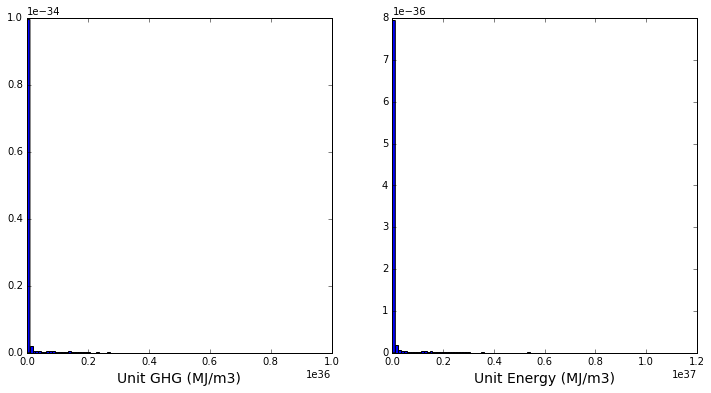

In [5]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,2, 1)
plt.hist(Total_GHG_m3,bins=100,normed=1)
plt.xlabel('Unit GHG (MJ/m3)',fontsize=14)


ax = fig.add_subplot(1, 2, 2)
plt.hist(Total_ENERGY_m3,bins=100,normed=1)
plt.xlabel('Unit Energy (MJ/m3)',fontsize=14)


In [6]:
describe(Total_GHG_m3)

DescribeResult(nobs=10001L, minmax=(0.1987894291017378, 9.0407334203058275e+35), mean=1.2218639807077368e+34, variance=2.9511794087228558e+69, skewness=6.963160685508025, kurtosis=62.192666065825804)

In [7]:
describe(Total_ENERGY_m3)

DescribeResult(nobs=10001L, minmax=(4.0512372546608839, 1.1275698894943877e+37), mean=1.8731699837830228e+35, variance=6.8919376930346431e+71, skewness=6.669113690067108, kurtosis=54.49605441449286)